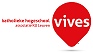<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2022-2023<br>
Andy Louwyck

---



---



# TOPIC 1-2: WAT IS MACHINE LEARNING?

Notebook met de opgaven van de oefeningen bij de inleiding van het vak Machine Learning Fundamentals.

## FORMULES

### Voorbeeld 1: sommatie

Tel de getallen 1 t.e.m. 4 op. Gebruik daarvoor een `for`-lus en een lusvariabele `i`. Zorg er ook voor dat de som en het resultaat als volgt worden uitgeprint:

`1 + 2 + 3 + 4 = 10`

In [ ]:
# Initialiseer de variabele voor de som
som = 0

# Loop door de getallen 1 t.e.m. 4 met behulp van een for-lus
for i in range(1, 5):
    # Tel elk getal op bij de som
    som += i

# Print het resultaat in het gewenste formaat
print("1 + 2 + 3 + 4 =", som)

#------------------------

som = 0
n = 4
for i in range(1, n + 1):
  som += i
  print(i, end=" + " if i < n else " ")
print(f"= {som}")

1 + 2 + 3 + 4 = 10
1 + 2 + 3 + 4 = 10


Kan je het ook zonder lus gebruik makend van een NumPy array?

In [ ]:
import numpy as np

# Maak een NumPy-array van 1 tot en met 4
getallen = np.array([1, 2, 3, 4])

# Bereken de som van de getallen in de array
som = np.sum(getallen)

# Print het resultaat in het gewenste formaat
print("1 + 2 + 3 + 4 =", som)


#-------------------------------------


arr = np.arange(1, 5)
print(" + ".join(arr.astype(str)), "=", arr.sum())

1 + 2 + 3 + 4 = 10
1 + 2 + 3 + 4 = 10


### Voorbeeld 2: voorwaardelijke kans

Bekijk volgende gegeven kansen:
- De kans dat het regent als je in België bent is 80%
- De kans dat het regent als je in Frankrijk bent is 60%

Sla deze kansen op als floats tussen 0 en 1, in een geneste dictionary waarbij je de velden `"regen"`, `"België"` en `"Frankrijk"` gebruikt. Voeg ook het veld `"zon"` toe met de kansen wanneer het niet regent als je in België of in Frankrijk bent. Ken de dictionary toe aan variabele `P`.

Definieer een variabele `A` die de string "regen" bevat, en de variabele `B` die de string "België" bevat. Maak gebruik van `P`, `A` en `B` om de kans op te vragen dat het regent als je in België bent.

In [ ]:
# Definieer de geneste dictionary met de kansen
P = {
    "regen": {
        "België": 0.80,
        "Frankrijk": 0.60
    },
    "zon": {
        "België": 0.20,  # Kans op zon als je in België bent (1 - 0.80)
        "Frankrijk": 0.40  # Kans op zon als je in Frankrijk bent (1 - 0.60)
    }
}

# Definieer variabelen A en B
A = "regen"
B = "België"

# Bereken de kans dat het regent als je in België bent
kans_regen_in_België = P[A][B]

# Print het resultaat. waarden worden uit dictionary gehaald
print("De kans dat het regent als je in België bent is", kans_regen_in_België)


De kans dat het regent als je in België bent is 0.8


Sla nu dezelfde data op in een Pandas `DataFrame` met kolomnamen `"België"` en `"Frankrijk"` en met rijnamen `"regen"` en `"zon"`. Ken dat dataframe opnieuw toe aan variabele `P` en vraag de kans op dat het regent als je in België bent gebruik makend van variabelen `A` en `B`.

In [ ]:
import pandas as pd

# Maak een Pandas DataFrame met de gegeven data
data = {
    "België": [0.80, 0.20],
    "Frankrijk": [0.60, 0.40]
}
P = pd.DataFrame(data, index=["regen", "zon"])

# Definieer variabelen A en B
A = "regen"
B = "België"

# Vraag de kans op dat het regent als je in België bent op
kans_regen_in_België = P.loc[A, B]

# Print het resultaat
print("De kans dat het regent als je in België bent is", kans_regen_in_België)


De kans dat het regent als je in België bent is 0.8


## THERMOSTAAT

Schrijf een Python-programma dat de werking van een eenvoudige kamerthermostaat implementeert: als het kouder is dan 17,5°C, dan moet de verwarming aan staan, anders af.

In [ ]:
# Prompt the user for the current temperature
temperatuur = float(input("Voer de huidige temperatuur in (in graden Celsius): "))

# Check if the temperature is less than 17.5°C
if temperatuur < 17.5:
    print("Het is kouder dan 17,5°C. Verwarming is aan.")
else:
    print("Het is niet kouder dan 17,5°C. Verwarming is uit.")


Voer de huidige temperatuur in (in graden Celsius): 20
Het is niet kouder dan 17,5°C. Verwarming is uit.


Dit is een voorbeeld van traditioneel programmeren: de model met de beslissingregel is gegeven, nl. als het kouder is dan 17,5°, dan is de verwarming aan, anders uit.

In Machine Learning leiden we het model af a.d.h.v. data. De drempel van 17,5° kennen we niet, maar we hebben bijvoorbeeld wel een tabel van gemeten temperaturen waarbij is vastgesteld of de verwarming aan of uit staat:

In [ ]:
import pandas as pd

temperaturen = [17.1, 15.6, 23.1, 19.8, 12.9, 21.6, 20.3, 18.7]
verwarming = ["aan", "aan", "uit", "uit", "aan", "uit", "uit", "uit"]
tabel = pd.DataFrame(dict(temperaturen=temperaturen, verwarming=verwarming))
tabel

,temperaturen,verwarming
0,17.1,aan
1,15.6,aan
2,23.1,uit
3,19.8,uit
4,12.9,aan
5,21.6,uit
6,20.3,uit
7,18.7,uit


We kunnen nu het algoritme implementeren dat de maximale temperatuur zoekt waarbij de verwarming aan staat, en de minimale temperatuur waarbij de verwarming uit is, en dan de drempel berekent als het gemiddelde van die twee temperaturen:

In [ ]:
import pandas as pd

temperaturen = [17.1, 15.6, 23.1, 19.8, 12.9, 21.6, 20.3, 18.7]
verwarming = ["aan", "aan", "uit", "uit", "aan", "uit", "uit", "uit"]
tabel = pd.DataFrame(dict(temperaturen=temperaturen, verwarming=verwarming))

# Filter de temperatuurwaarden waarbij de verwarming aan staat en bepaal de maximale temperatuur
max_temp_verwarming_aan = tabel[tabel["verwarming"] == "aan"]["temperaturen"].max()

# Filter de temperatuurwaarden waarbij de verwarming uit staat en bepaal de minimale temperatuur
min_temp_verwarming_uit = tabel[tabel["verwarming"] == "uit"]["temperaturen"].min()

# Bereken de drempeltemperatuur als het gemiddelde van de maximale temperatuur waarbij de verwarming aan staat
# en de minimale temperatuur waarbij de verwarming uit is
drempel_temperatuur = (max_temp_verwarming_aan + min_temp_verwarming_uit) / 2

print("De drempeltemperatuur is:", drempel_temperatuur)


De drempeltemperatuur is: 17.9


Deze drempel kunnen we nu in ons programma stoppen, waarbij we natuurlijk de berekening van de drempel volledig gaan automatiseren:

In [ ]:
import pandas as pd

def bereken_drempel(temperaturen, verwarming):
    tabel = pd.DataFrame(dict(temperaturen=temperaturen, verwarming=verwarming))

    # Filter de temperatuurwaarden waarbij de verwarming aan staat en bepaal de maximale temperatuur
    max_temp_verwarming_aan = tabel[tabel["verwarming"] == "aan"]["temperaturen"].max()

    # Filter de temperatuurwaarden waarbij de verwarming uit staat en bepaal de minimale temperatuur
    min_temp_verwarming_uit = tabel[tabel["verwarming"] == "uit"]["temperaturen"].min()

    # Bereken de drempeltemperatuur als het gemiddelde van de maximale temperatuur waarbij de verwarming aan staat
    # en de minimale temperatuur waarbij de verwarming uit is
    drempel_temperatuur = (max_temp_verwarming_aan + min_temp_verwarming_uit) / 2

    return drempel_temperatuur

# Voorbeeldgegevens
temperaturen = [17.1, 15.6, 23.1, 19.8, 12.9, 21.6, 20.3, 18.7]
verwarming = ["aan", "aan", "uit", "uit", "aan", "uit", "uit", "uit"]

# Roep de functie aan om de drempeltemperatuur te berekenen
drempel = bereken_drempel(temperaturen, verwarming)

print("De drempeltemperatuur is:", drempel)


De drempeltemperatuur is: 17.9


We kunnen zelfs nog een eenvoudiger algoritme bedenken: we nemen de toestand "aan" of "uit" over van de temperatuur die het dichtst ligt bij de opgegeven temperatuur:

In [ ]:
import pandas as pd

def bepaal_verwarmingstemperatuur(temperaturen, verwarming, doeltemperatuur):
    # Vind de index van de temperatuur die het dichtst ligt bij de doeltemperatuur
    index_dichtstbijzijnde_temperatuur = min(range(len(temperaturen)), key=lambda i: abs(temperaturen[i] - doeltemperatuur))

    # Retourneer de verwarmingstoestand die hoort bij de temperatuur die het dichtst ligt bij de doeltemperatuur
    return verwarming[index_dichtstbijzijnde_temperatuur]

# Voorbeeldgegevens
temperaturen = [17.1, 15.6, 23.1, 19.8, 12.9, 21.6, 20.3, 18.7]
verwarming = ["aan", "aan", "uit", "uit", "aan", "uit", "uit", "uit"]
doeltemperatuur = 17.5

# Bepaal de verwarmingstoestand voor de doeltemperatuur
verwarmingstoestand = bepaal_verwarmingstemperatuur(temperaturen, verwarming, doeltemperatuur)

print(f"Voor de doeltemperatuur van {doeltemperatuur}°C is de verwarmingstoestand: {verwarmingstoestand}.")


Voor de doeltemperatuur van 17.5°C is de verwarmingstoestand: aan.


## SPAM AND HAM

### Voorbeeld 1

Lees de file "mails_stefaan.txt" in en implementeer een algoritme dat o.b.v. de data in deze file een regel afleidt die beslist of een nieuwe mail van Stefaan gewenst of ongewenst is.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # filename = '/content/drive/MyDrive/mails_stefaan.txt'
# # with open(filename, 'r') as file:
# #     content = file.read()
# # print(content)


# mijnBestand = open('/content/drive/MyDrive/mails_stefaan.txt')
# # print(mijnBestand.read(20)) #eerste xx karakters uitlezen
# # print(mijnBestand.read()) #volledige inhoud uitlezen
# print(mijnBestand.readlines()) #volledige inhoud uitlezen in als List
# mijnBestand.close()


import numpy as np


def read_mails_txt(filename):
    with open(filename, "r") as f:  # file openen om te lezen
        mails = f.read().splitlines()  # volledige inhoud als string inlezen en splitten in lines
    return mails

def get_ham_frequency(mails):
    mails = np.array(mails)  # omzetten naar numpy array
    return np.sum(mails == "ham") / mails.size  # aantal ham mails delen door totaal aantal mails

p = get_ham_frequency(read_mails_txt("/content/drive/MyDrive/mails_stefaan.txt")) * 100  # percentage ham mails
print(f"De voorbije week waren {p:.1f}% van de mails van Stefaan gewenst.")
if p >= 50:  # als percentage groter is dan of gelijk aan 50%, mails blijven lezen
    print("Daarom is het aan te raden om zijn mails te blijven lezen.")
else:  # als percentage kleiner is dan 50%, mails verwijderen
    print("Daarom kan het geen kwaad om zijn mails direct te verwijderen.")





De voorbije week waren 60.0% van de mails van Stefaan gewenst.
Daarom is het aan te raden om zijn mails te blijven lezen.


### Voorbeeld 2

Lees de file "mails_stefaan.json" in en implementeer een algoritme dat o.b.v. de data in deze file een regel afleidt die beslist of een nieuwe mail van Stefaan met gegeven grootte al dan niet gewenst is.

In [ ]:
import numpy as np
import pandas as pd


# Functie om de json-bestanden te lezen
def read_mails_json(filename):
    mails = pd.read_json(filename)  # json-file inlezen als dataframe
    mails.columns = ["id", "mail", "grootte"]  # kolomnamen
    return mails

# Functie om de maximale grootte van ham mails te vinden
def max_size_ham(mails):
    spam_vs_ham = mails[["mail", "grootte"]].groupby("mail")  # mails groeperen volgens spam en ham
    max_spam_vs_ham = spam_vs_ham.max()  # maximum grootte van spam en ham mails
    max_ham = max_spam_vs_ham.loc["ham"]  # we hebben enkel de max grootte van ham mails nodig
    return max_ham.values.item()  # waarde retourneren ipv dataframe of array met één element

# Functie om de minimale grootte van spam mails te vinden
def min_size_spam(mails):
    spam_vs_ham = mails[["mail", "grootte"]].groupby("mail")  # mails groeperen volgens spam en ham
    min_spam_vs_ham = spam_vs_ham.min()  # minimum grootte van spam en ham mails
    min_spam = min_spam_vs_ham.loc["spam"]  # we hebben enkel de min grootte van spam mails nodig
    return min_spam.values.item()  # waarde retourneren ipv dataframe of array met één element

# Functie om te bepalen of een mail op basis van grootte ham is
def is_ham_grootte(mails, grootte):
    max_ham = max_size_ham(mails)  # max grootte ham mails
    min_spam = min_size_spam(mails)  # min grootte spam mails
    drempel = (min_spam + max_ham) / 2  # drempel is gemiddelde grootte
    return grootte < drempel  # ham als grootte kleiner is dan drempel


def is_ham_nearest_neighbor(mails, grootte):
    return mails.loc[(mails.grootte - grootte).abs().argmin(), "mail"] == "ham"



mails = read_mails_json("/content/drive/MyDrive/mails/mails_stefaan.json")


# max_groote_ham = max_size_ham(mails)
# min_grote_spam = min_size_spam(mails)
# is_ham_grootte("mails", max_groote_ham)





def bepaal_drempelwaarde(mails):
    return (max_size_ham(mails) + min_size_spam(mails)) / 2

def classificeer_email(grootte, drempel):
    return 'ham' if grootte < drempel else 'spam'


# Bepaal de drempelwaarde
drempel = bepaal_drempelwaarde(mails)

# Voorbeeld van hoe je dit zou toepassen voor een nieuwe e-mail
grootte_van_nieuwe_mail = 5  #voorbeeld grote van onze nieuwe mail
classificatie = classificeer_email(grootte_van_nieuwe_mail, drempel)

print(f'Deze mail wordt geclassificeerd als: {classificatie}')
read_mails_json("/content/drive/MyDrive/mails/mails_stefaan.json")


Deze mail wordt geclassificeerd als: ham


,id,mail,grootte
0,0,spam,20
1,1,spam,15
2,2,ham,1
3,3,spam,16
4,4,spam,12
5,5,ham,5
6,6,ham,3
7,7,spam,18
8,8,ham,7
9,9,ham,2


### Voorbeeld 3

Lees de file "mails_stefaan.csv" in en implementeer een algoritme dat o.b.v. de data in deze file een regel afleidt die beslist of een nieuwe mail van Stefaan al dan niet gewenst is waarbij de dag is gegeven waarop de mails is verstuurd.

In [ ]:
from posixpath import sep
import numpy as np
import pandas as pd


# # Functie om de json-bestanden te lezen
# def read_mails_csv(filename, sep=";"):
#     mails = pd.read_csv(filename, sep=sep)  # csv-file inlezen als dataframe
#     mails["is_ham"] = mails["mails"] == "ham"  # kolomnamen
#     return mails


# read_mails_json("/content/drive/MyDrive/mails/mails_stefaan.csv")

#------------------------------------------

# def read_mails_csv(filename, sep=";"):
#     mails = pd.read_csv(filename, sep=sep)
#     # if len(mails.columns) == 3:
#     mails.columns = ["id", "mail", "weekdag"]
#     mails['is_ham'] = mails["mail"] == "ham"
#     return mails


def read_mails_csv(filename, sep=";"):
    mails = pd.read_csv(filename, sep=sep)  # CSV-file inlezen als dataframe
    mails["is_ham"] = mails["mail"] == "ham"  # kolom "is_ham" met booleans toevoegen
    return mails

def get_ham_frequencies(mails):
    is_ham_weekdag = mails[["weekdag", "is_ham"]].groupby("weekdag")  # kolom "is_ham" groeperen per weekdag
    rel_freq = lambda x: x.sum() / len(x)  # relatieve frequentie: aantal ham / totaal aantal mails
    return is_ham_weekdag.apply(rel_freq)

def is_ham_weekdag(mails, weekdag, drempel=0.5):
    frequencies = get_ham_frequencies(mails)  # eerst relatieve frequenties voor ham per weekdag berekenen
    return frequencies.loc[weekdag, "is_ham"] >= drempel  # True als relatieve frequentie >= drempel


mails = read_mails_csv("/content/drive/MyDrive/mails/mails_stefaan.csv")
read_mails_csv("/content/drive/MyDrive/mails/mails_stefaan.csv")
get_ham_frequencies(mails)
is_ham_weekdag(mails,'zondag',0.75)


False

### Voorbeeld 4

Implementeer nu een algoritme die de data uit "mails_stefaan.json" en "mails_stefaan.csv" combineert om een regel af te leiden die beslist of een nieuwe mail met gekende grootte en dag van versturen al dan niet gewenst is.

In [ ]:
import pandas as pd


def read_mails_json(json_filename):
    # Load JSON data into DataFrame
    mails_json = pd.read_json(json_filename)
    mails_json.columns = ["id", "mail", "size"]
    return mails_json

def read_mails_csv(csv_filename, sep=";"):
    # Load CSV data into DataFrame
    mails_csv = pd.read_csv(csv_filename, sep=sep)
    # Assuming the CSV has the same structure, no need to rename columns
    return mails_csv

# def join_files(json_filename, csv_filename):
#     # Read the files into DataFrames
#     mails_json = read_mails_json(json_filename)
#     mails_csv = read_mails_csv(csv_filename)
#     # Merge the DataFrames on the "id" column
#     combined_mails = pd.merge(mails_json, mails_csv, on="id", how="inner")
#     return combined_mails


def is_ham_grootte_weekdag(mails,grootte, weekdag, drempel=0.5):
  return is_ham_weekdag(mails,weekdag,drempel) and is_ham_groote(mails,grootte)

def join_files(json_filename, csv_filename):
  mails_json = read_mails_json(json_filename)
  mails_csv = read_mails_csv(csv_filename)
  del mails_csv["mail"] # mail kolom uit csv file verwijderen omdat deze al in json data frame zit
  return  pd.merge(mails_json, mails_csv, on="id", how='inner')

join_files("/content/drive/MyDrive/mails/mails_stefaan.json", "/content/drive/MyDrive/mails/mails_stefaan.csv")

,id,mail,size,weekdag
0,0,spam,20,maandag
1,1,spam,15,zondag
2,2,ham,1,zondag
3,3,spam,16,zaterdag
4,4,spam,12,zondag
5,5,ham,5,dinsdag
6,6,ham,3,donderdag
7,7,spam,18,woensdag
8,8,ham,7,vrijdag
9,9,ham,2,dinsdag


### Voorbeeld 5

Net als in de vorige oefening maak je opnieuw gebruik van de data uit "mails.stefaan.json" en "mails_stefaan.csv", maar deze keer bereken je voor alle mails uit die dataset een score die gelijk is aan de som van de index van de dag waarop de mail is verstuurd en de grootte van de mail:

`score = dag_index + grootte`

De index van de dag bekom je door maandag gelijk te stellen aan 0, dinsdag aan 1, woensdag aan 2, enzovoort. Implementeer dan een algoritme die op basis van deze scores beslist of een nieuwe mail van Stefaan, waarvan je de score op dezelfde manier berekent, gewenst is of niet gewenst.

In [ ]:
import pandas as pd

# Map weekdagen naar indices
weekdag_naar_index = {
    'maandag': 0,
    'dinsdag': 1,
    'woensdag': 2,
    'donderdag': 3,
    'vrijdag': 4,
    'zaterdag': 5,
    'zondag': 6
}

def read_mails_json(json_filename):
    mails_json = pd.read_json(json_filename)
    mails_json.columns = ["id", "mail", "grootte"]
    return mails_json

def read_mails_csv(csv_filename, sep=";"):
    mails_csv = pd.read_csv(csv_filename, sep=sep)
    mails_csv.columns = ["id", "mail", "weekdag"]
    return mails_csv


# Functie om data te combineren en scores te berekenen
def combine_and_score_data(json_data, csv_data):
    # Samenvoegen van de dataframes op de 'id' kolom
    combined_data = pd.merge(json_data, csv_data, on='id')
    # Bereken de score voor elke mail
    combined_data['score'] = combined_data['weekdag'].map(weekdag_naar_index) + combined_data['grootte']
    return combined_data

# JSON en CSV bestanden lezen
json_data = read_mails_json('/content/drive/MyDrive/mails/mails_stefaan.json')  # Pas het pad aan naar je JSON bestand
csv_data = read_mails_csv("/content/drive/MyDrive/mails/mails_stefaan.csv")    # Pas het pad aan naar je CSV bestand

# Data combineren en scores berekenen
combined_data_with_scores = combine_and_score_data(json_data, csv_data)

# Algoritme om te bepalen of een nieuwe mail gewenst is
def is_desired_email(email_score, combined_data):
    # Een simpele regel zou kunnen zijn dat als de score onder een bepaalde drempel ligt, de mail gewenst is
    # Bijvoorbeeld: als de score lager is dan de mediane score van de dataset
    median_score = combined_data['score'].median()
    return email_score < median_score

# Stel dat we de score van een nieuwe mail hebben
new_email_score = int(input('geef score van nieuwe mail in:'))  # Verkrijgen van de dagindex en optellen bij de grootte van de mail

# Bepalen of de nieuwe mail gewenst is
is_new_email_desired = is_desired_email(new_email_score, combined_data_with_scores)
print("Is de nieuwe mail gewenst?", is_new_email_desired)

geef score van nieuwe mail in:55
Is de nieuwe mail gewenst? False


### Voorbeeld 6

Probeer nu met de data die je voorhanden hebt een algoritme te implementeren die de volgende regels toepast om de mails als ham of spam te classificeren:

- Als de grootte van een nieuwe mail verstuurd in het weekend kleiner is dan het gemiddelde van de minimale grootte van de spam mails in het weekend en de maximale grootte van de ham mails in het weekend, dan is ze ham.
- Als de grootte van een nieuwe mail verstuurd tijdens de werkweek kleiner is dan het gemiddelde van de minimale grootte van de spam mails tijdens de werkweek en de maximale grootte van de ham mails tijdens de werkweek, dan is ze ham.
- In alle andere gevallen is ze spam.

Maak gebruik van een Python klasse om de vereiste gemiddeldes te berekenen.

In [ ]:
class MailSize:

  def __init__(self, mails):
    self.mails = mails  # dataframe met kolommen "mail", "weekdag" en "grootte"
    self.__grouped = None  # private

  def group(self):
    self.mails["is_weekend"] = mails.weekdag.isin(["zaterdag", "zondag"])  # boolean kolom "is_weekend" toevoegen
    self.__grouped = mails[["mail", "is_weekend", "grootte"]].groupby(["mail", "is_weekend"])  # groeperen op "mail" en "isweekend"

  def size(self, min_or_max, spam_or_ham, is_weekend):
    if min_or_max == "min":
      m = self.__grouped.min()  # bereken min grootte van alle groepen
    else:
      m = self.__grouped.max()  # bereken max grootte van alle groepen
    return m.loc[(spam_or_ham, is_weekend), "grootte"]  # retourneer gevraagde grootte
def is_ham_grootte_weekend_werkweek(mails, grootte, weekdag):
  mail_size = MailSize(mails)  # MailSize object aanmaken
  mail_size.group()  # mails groeperen
  is_weekend = weekdag in ["zaterdag", "zondag"]
  drempel = (mail_size.size("min", "spam", is_weekend) +
             mail_size.size("max", "ham", is_weekend)) / 2
  return grootte < drempel # ham als grootte kleiner is dan drempel
mails = join_files("/content/drive/MyDrive/mails/mails_stefaan.json", "/content/drive/MyDrive/mails/mails_stefaan.csv")  # data uit json-file en csv-file  samenvoegen

mail_size = MailSize(mails)  # MailSize object aanmaken
mail_size.group()  # mails groeperen

# min en max grootte voor ham of spam tijdens weekend of werkweek uitprinten
for min_or_max in ["min", "max"]:
  for spam_or_ham in ["spam", "ham"]:
    for is_weekend in [True, False]:
      dag = "weekend" if is_weekend else "werkweek"
      print(min_or_max, "grootte", spam_or_ham, dag, "is",
            mail_size.size(min_or_max, spam_or_ham, is_weekend), "KB")

min grootte spam weekend is 8 KB
min grootte spam werkweek is 13 KB
min grootte ham weekend is 1 KB
min grootte ham werkweek is 1 KB
max grootte spam weekend is 25 KB
max grootte spam werkweek is 20 KB
max grootte ham weekend is 1 KB
max grootte ham werkweek is 7 KB


### Voorbeeld 7

Lees de file "mails_stefaan.xlsx" in en bereken o.b.v. de data in deze file en de data uit de files "mails_stefaan.json" en "mails_stefaan.csv" voor alle mails in de dataset de volgende score:

`score = dag_index + grootte + 10 * tikfouten - aantal_AI + 4 * aantal_café`

De index van de dag wordt bepaald zoals in de vorige oefening. Implementeer dan een algoritme die op basis van deze scores beslist of een nieuwe mail van Stefaan, waarvan je de score op dezelfde manier berekent, gewenst is of niet gewenst.




In [ ]:
import pandas as pd

def read_mails_json(filename):
  mails = pd.read_json(filename)  # json-file inlezen als dataframe
  mails.columns = ["id", "mail", "grootte"]  # kolomnamen
  return mails

def read_mails_csv(filename, sep=";"):
  mails = pd.read_csv(filename, sep=sep)  # csv-file inlezen als dataframe
  mails["is_ham"] = mails["mail"] == "ham"  # kolom "is_ham" met booleans toevoegen
  return mails


def join_files(json_filename, csv_filename):
  mails_json = read_mails_json(json_filename)  # json-file inlezen
  mails_csv = read_mails_csv(csv_filename)  # csv-file inlezen
  del mails_csv["mail"]  # kolom "mail" uit csv dataframe verwijderen omdat die al in json dataframe zit
  return pd.merge(mails_json, mails_csv, on="id", how="inner")  # inner join op kolom "id" uitvoeren en retourneren


def join_all_files(json_filename, csv_filename, xls_filename):
  mails = join_files(json_filename, csv_filename)  # data json- en csv-file samenvoegen
  mails_xls = pd.read_excel(xls_filename)  # xls-file inlezen als dataframe
  del mails_xls["mail"]  # kolom "mail" uit xls dataframe verwijderen omdat die al bestaat
  return pd.merge(mails, mails_xls, on="id", how="inner")  # inner join op kolom "id" uitvoeren en retourneren
def is_ham(mails, grootte, weekdag, tikfouten=0, aantal_café=0, aantal_AI=0):
  # dictionary om weekdag om te zetten naar id
  weekdag_id = {
      "maandag": 0,
      "dinsdag": 1,
      "woensdag": 2,
      "donderdag": 3,
      "vrijdag": 4,
      "zaterdag": 5,
      "zondag": 6
  }
  # kolom score = weekdag_id + grootte
  mails["score"] = mails.grootte + mails.weekdag.apply(lambda dag: weekdag_id[dag]) + \
                   10 * mails.tikfouten - mails.aantal_AI + 4 * mails.aantal_café
  # drempel = minimale score van alle spam
  drempel = (mails[mails.mail == "spam"].score.min() +
             mails[mails.mail == "ham"].score.max()) / 2
  # score mail = weekdag_id + grootte
  score = grootte + weekdag_id[weekdag] + 10 * tikfouten - aantal_AI + 4 * aantal_café
  # is ham als score < drempel
  return score < drempel
# data uit json-file, csv-file en xlsx-file samenvoegen
mails = join_all_files("/content/drive/MyDrive/mails/mails_stefaan.json", "/content/drive/MyDrive/mails/mails_stefaan.csv", "/content/drive/MyDrive/mails/mails_stefaan.xlsx")

# nieuwe mails als list van dictionaries definiëren
nieuwe_mails = [dict(grootte=9, weekdag="maandag", tikfouten=1, aantal_café=1, aantal_AI=1),
                dict(grootte=10, weekdag="woensdag", tikfouten=3),
                dict(grootte=3, weekdag="zaterdag", aantal_AI=2)]

# nieuwe mails één voor één voorlopen
for mail in nieuwe_mails:
  print(f"Mail van Stefaan:")
  # key/value paren in mail dictionary overlopen en uitprinten
  for attribuut, waarde in mail.items():
    print("\t", attribuut, ": ", waarde, sep="")
  # resultaat uitprinten
  wel_niet = "wel" if is_ham(mails, **mail) else "niet"  # boolean omzetten naar "wel" of "niet"
  print(f"--> Beter {wel_niet} lezen!\n")

Mail van Stefaan:
	grootte: 9
	weekdag: maandag
	tikfouten: 1
	aantal_café: 1
	aantal_AI: 1
--> Beter wel lezen!

Mail van Stefaan:
	grootte: 10
	weekdag: woensdag
	tikfouten: 3
--> Beter niet lezen!

Mail van Stefaan:
	grootte: 3
	weekdag: zaterdag
	aantal_AI: 2
--> Beter wel lezen!



## CLUSTERING

Lees de file "mails.csv" in als Pandas DataFrame en maak een scatter-plot met de "Size" van de mails op de x-as en de "Recipients" van de mails op de y-as. Wat stel je vast?

   E-mail  Size  Recipients
0       1     8           1
1       2    12           1
2       3    43           1
3       4    10           2
4       5    40           2
5       6    25           5
6       7    23           6
7       8    28           6
8       9    26           7


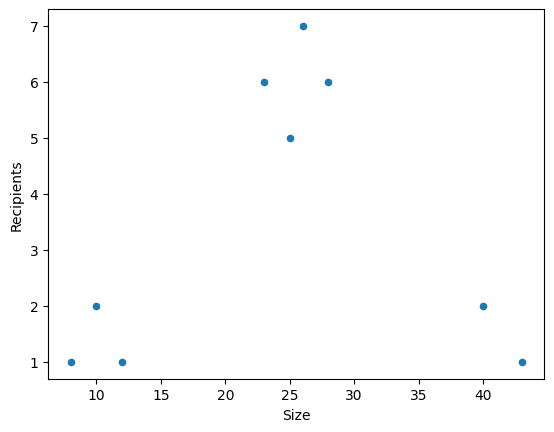

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/mails/mails.csv", sep=";")
print(df)


df.plot.scatter(x="Size", y="Recipients");